<div style="font-size: 18pt;">Classification and Regression Tree (CART)</div><br/>
<div style="font-size: 18pt;">- Classification tree</div><br/>
<div style="font-size: 18pt;">- Cross-validation</div><br/>
<div style="font-size: 18pt;">- Regression tree</div><br/>

In [1]:
#load necessary packages
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

/Users/muchacho/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [ ]:
#check current folder
os.chdir("C:/Users/THINK/Dysk Google/_Priv/Vistula_AML_course_2022/Python")
os.getcwd()

In [2]:
#load and inspect KPI data
kpi = pd.read_csv("data/KPI_data_for_logit_model.csv")
kpi.columns

Index(['Unnamed: 0', 'School', 'Chair', 'Function_degree', 'FTE',
       'KPI_assessment_1', 'Number.of.questionnaires_1', 'Average_grade_1',
       'NPS_1', 'Number_of_courses_1', 'Additional_achievement_1',
       'KPI_assessment_2', 'Number.of.questionnaires_2', 'Average_grade_2',
       'NPS_2', 'Number_of_courses_2', 'Research_activity_2',
       'Additional_activity_2', 'Negatives_2', 'X50_1', 'X20_1', 'X10_1',
       'X50_2', 'X20_2', 'X10_2', 'bonus_2', 'reduce_wage_2', 'fire_2',
       'X502010_1', 'X502010_2'],
      dtype='object')

In [6]:
#select columns that we will use
kpi = kpi[['KPI_assessment_1', 'Number.of.questionnaires_1', 'Average_grade_1', \
           'NPS_1', 'Additional_achievement_1', 'X502010_1']]
kpi.columns 

Index(['KPI_assessment_1', 'Number.of.questionnaires_1', 'Average_grade_1',
       'NPS_1', 'Additional_achievement_1', 'X502010_1'],
      dtype='object')

<div style="font-size: 14pt;">Task 1</div>
Train classification tree on KPI data

In [7]:
y502010 = kpi[['X502010_1']]
X = kpi.drop(['X502010_1'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y502010, test_size=0.2, \
                                                    random_state=4, stratify=y502010)

#check proportions of 1s, check the base model accuracy - majority rule
y_train.mean(), y_test.mean()

(X502010_1    0.412338
 dtype: float64,
 X502010_1    0.415584
 dtype: float64)

0.6103896103896105

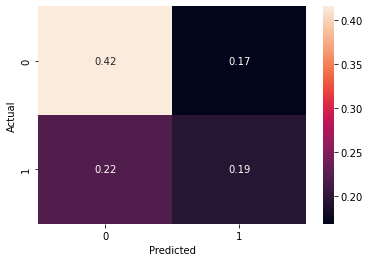

In [8]:
#recall logistic regression performance
y_train = y_train['X502010_1'].ravel()
y_test = y_test['X502010_1'].ravel()
model_kpi = LogisticRegression(random_state=100)
model_kpi.fit(x_train, y_train)
y_pred=model_kpi.predict(x_test)
cfm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
cfm = cfm / cfm.sum().sum()
sns.heatmap(cfm, annot=True)
accuracy = cfm.iloc[0,0] + cfm.iloc[1,1]
accuracy

In [9]:
#aplly the a CART classification model to the same data
# Create Decision Tree classifer object
# check documentation 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = DecisionTreeClassifier()

In [10]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [11]:
#Predict the class for test dataset, print accuracy
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


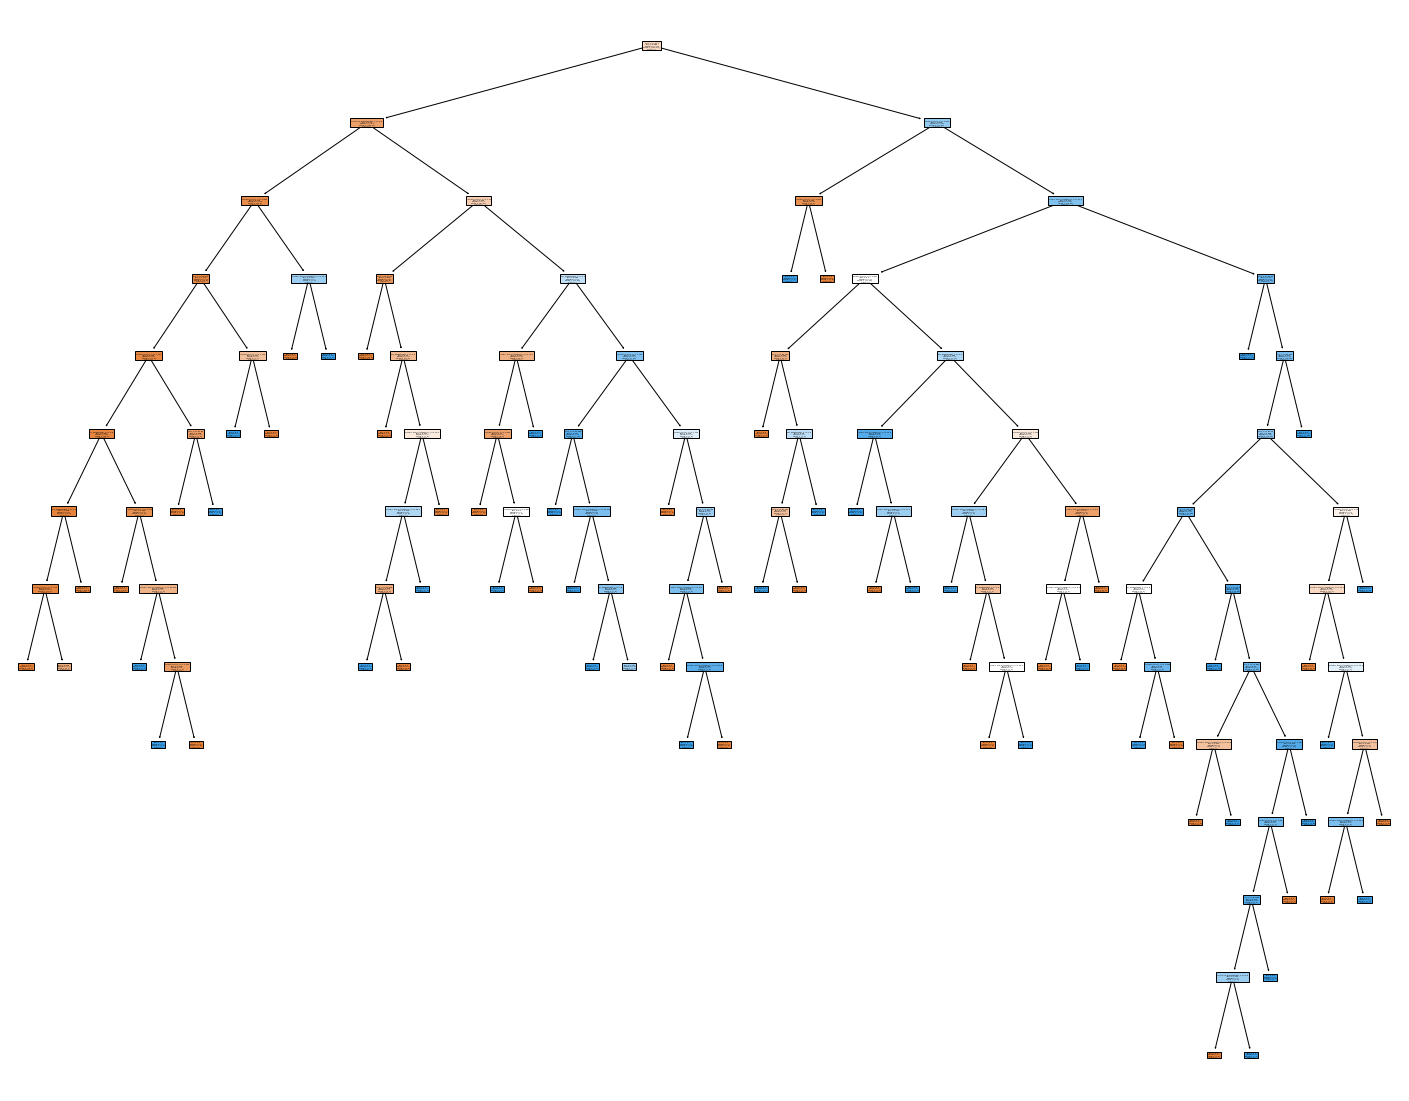

In [12]:
#plot the tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list(x_train.columns),  
                   class_names=["0", "1"],
                   filled=True)

In [ ]:
#save the figure
fig.savefig("img/kpi_tree.png")

In [ ]:
#print tree
text_representation = tree.export_text(clf)
print(text_representation)

<div style="font-size: 14pt;">Task 2</div>
Optimise tree parameters, use cross-validation

Accuracy: 0.7532467532467533


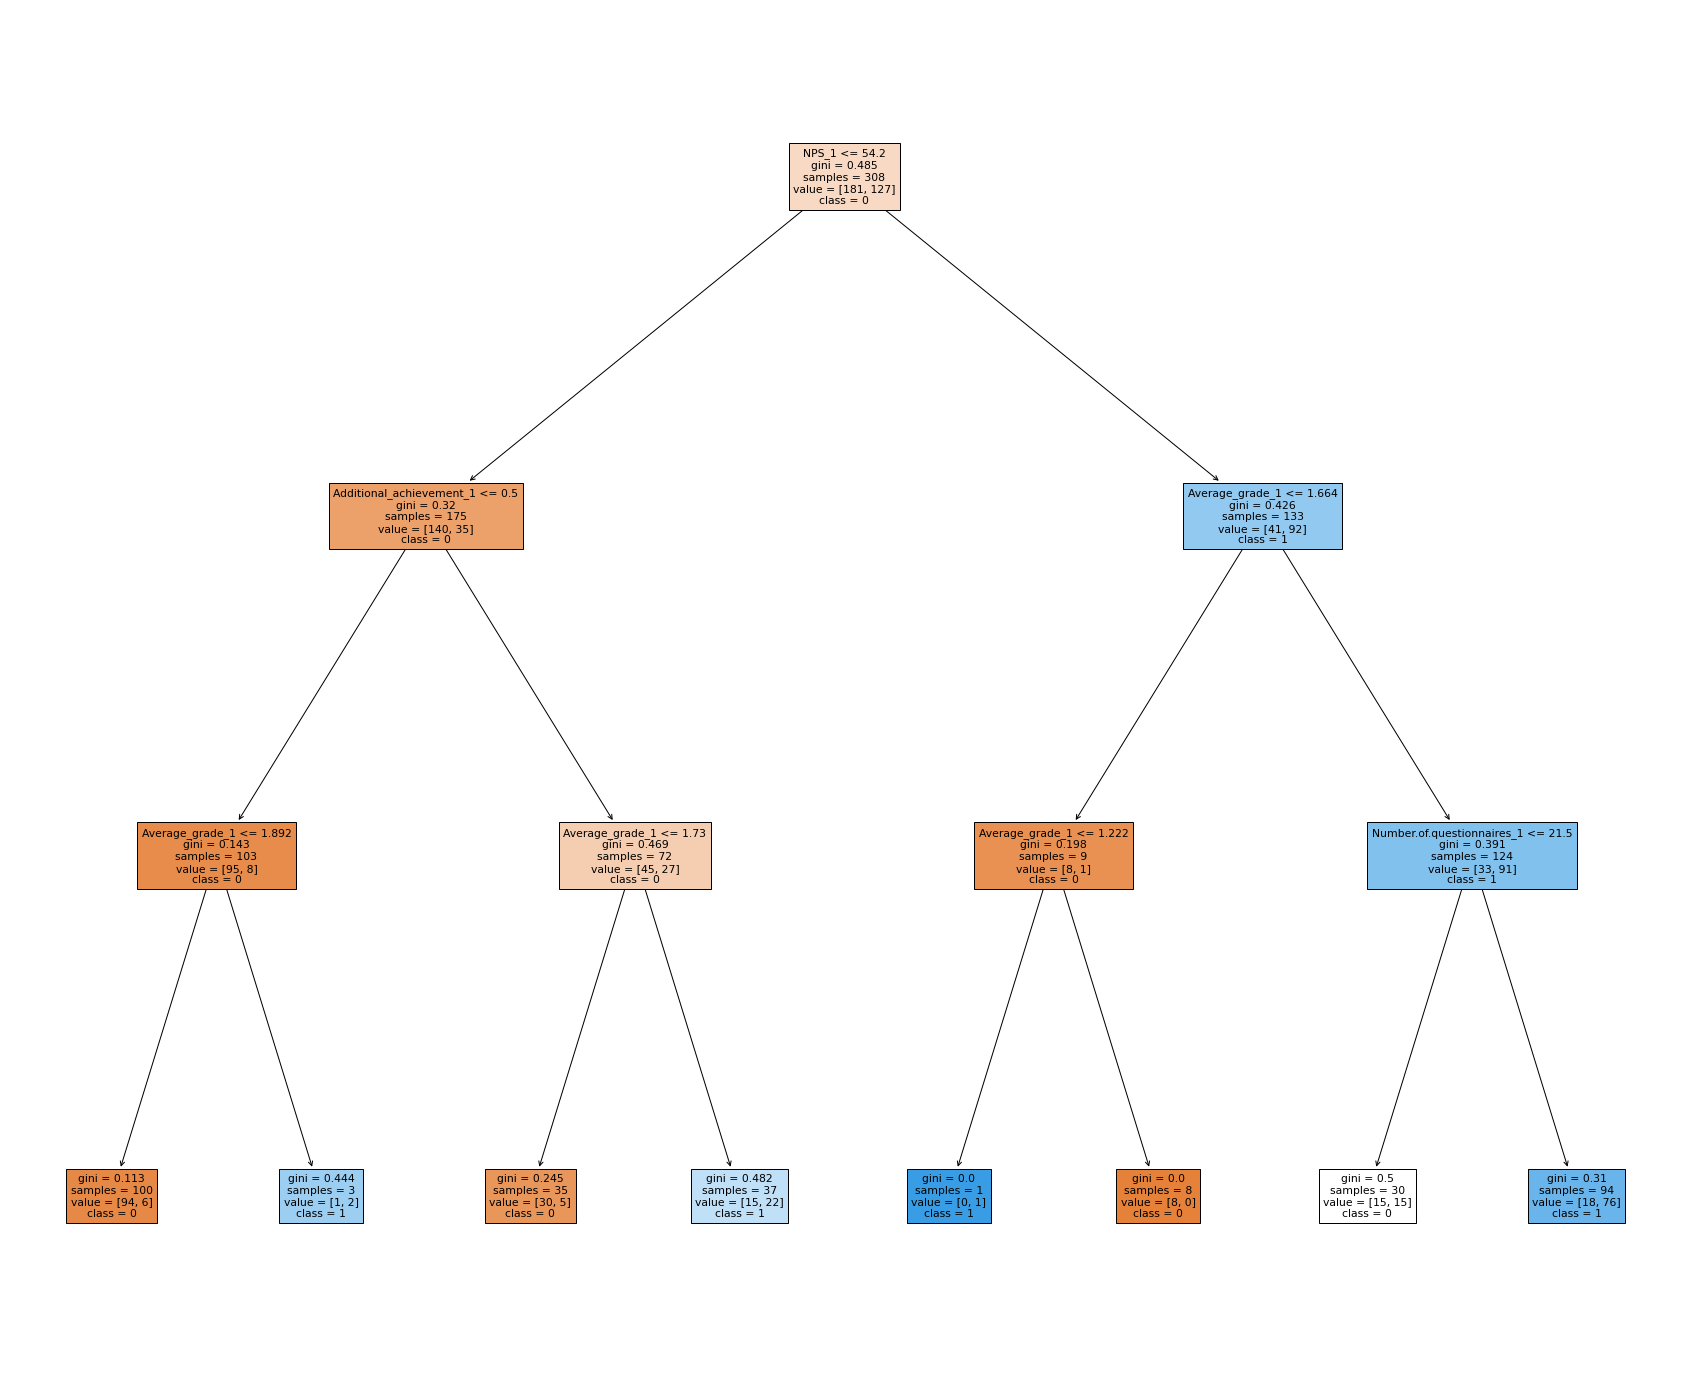

In [13]:
#optimising the tree and making it useful for decision-makers
#check the documentation
# # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#max depth
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(clf, 
                   feature_names=list(x_train.columns),  
                   class_names=["0", "1"],
                   filled=True)

Accuracy: 0.7272727272727273


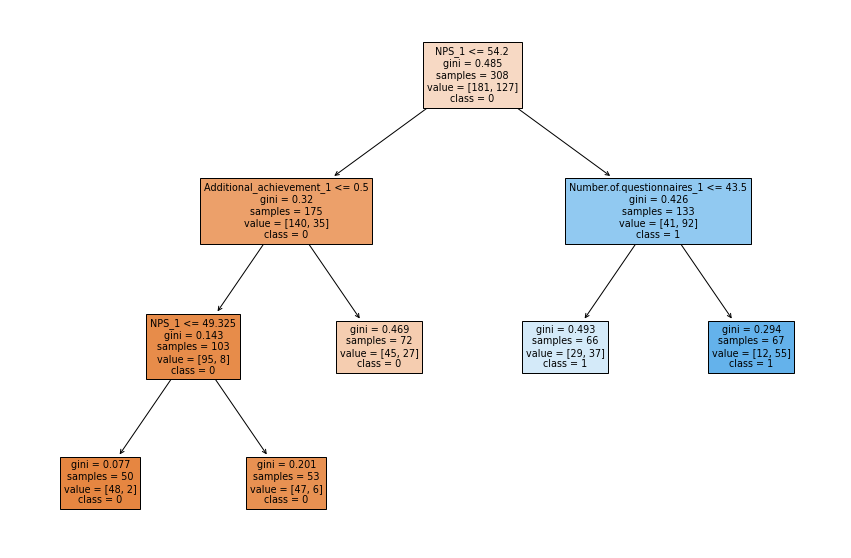

In [14]:
#min-bucket
clf = DecisionTreeClassifier(min_samples_leaf=50)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=list(x_train.columns),  
                   class_names=["0", "1"],
                   filled=True)

Accuracy: 0.7272727272727273


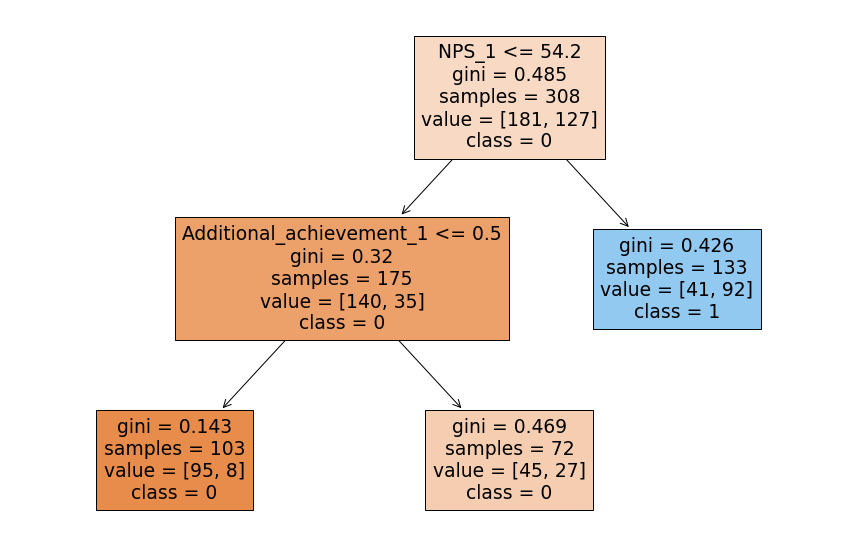

In [15]:
#mx no of leaves
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=list(x_train.columns),  
                   class_names=["0", "1"],
                   filled=True)

Accuracy: 0.7402597402597403


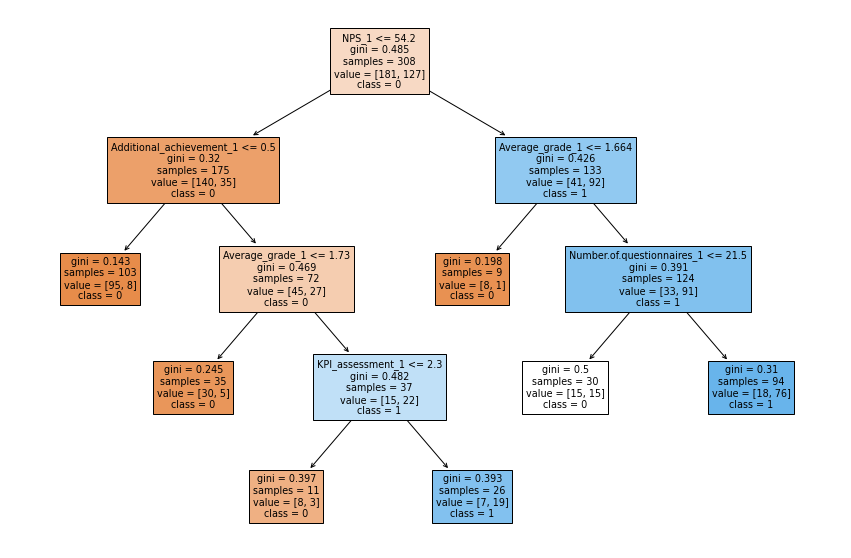

In [16]:
#tree prunning
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=list(x_train.columns),  
                   class_names=["0", "1"],
                   filled=True)

In [17]:
#lots of parameters to optimise
#if the goal is not to explain to manager but to generate best forecast
#then you can optimise parameters using cross-validation
clf = DecisionTreeClassifier()
params = {
    'max_depth': [2,3,4,5,6],
    'min_samples_leaf': [5,10,20,30,40,50],
    'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1]
}    

#check documentation 
grid_search = GridSearchCV(estimator=clf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)
grid_search.best_score_
clf_best = grid_search.best_estimator_
clf_best

Fitting 5 folds for each of 150 candidates, totalling 750 fits


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4, min_samples_leaf=5)

Accuracy: 0.7142857142857143


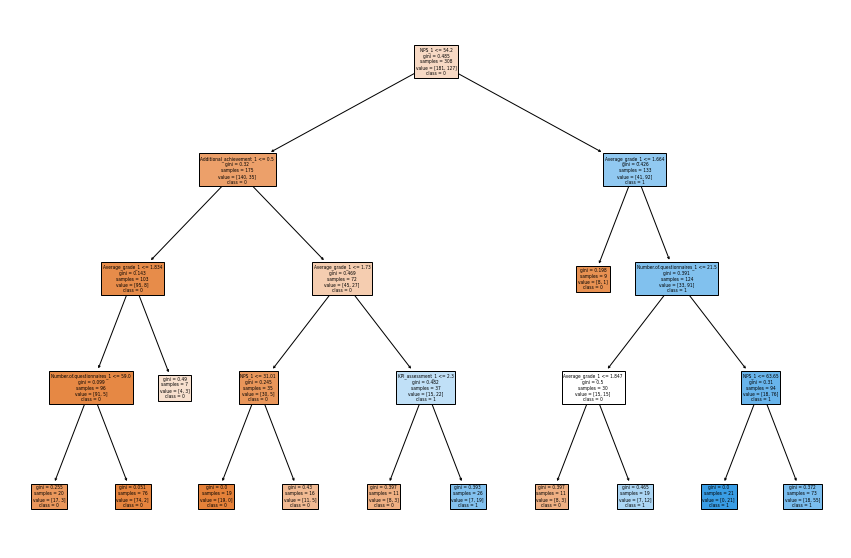

In [18]:
y_pred = clf_best.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_best, 
                   feature_names=list(x_train.columns),  
                   class_names=["0", "1"],
                   filled=True)

<div style="font-size: 14pt;">Task 3</div>
Train regression tree classifier on boston data

In [19]:
#load data
boston = datasets.load_boston()
pd.DataFrame( boston.data, columns=boston.feature_names ).head()
X = pd.DataFrame(boston.data, columns=boston.feature_names) 
y = pd.DataFrame(boston.target, columns=['Price']) 
X.shape

/Users/muchacho/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

(506, 13)

In [21]:
#recall the linear regression model
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


InvalidIndexError: (slice(None, None, None), None)

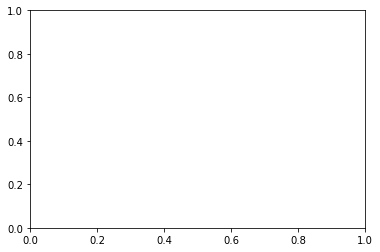

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
mod = sm.OLS(y_train, x_train)
result = mod.fit()
y_pred = result.predict(x_test)
plt.plot(y_test, y_pred, 'o', color='black');
plt.xlabel("actual"); plt.ylabel("predicted"); 
metrics.mean_squared_error(y_test, y_pred, squared=False)

InvalidIndexError: (slice(None, None, None), None)

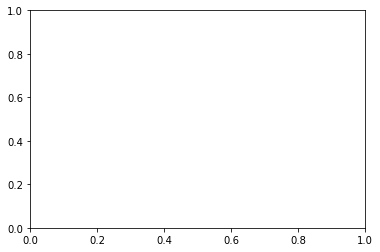

In [22]:
#Now regression CART model
dtr = DecisionTreeRegressor()
dtr = dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
plt.plot(y_test, y_pred, 'o', color='black');
plt.xlabel("actual"); plt.ylabel("predicted"); 
metrics.mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
set_config(print_changed_only=False)
dtr

In [ ]:
#try pruning
dtr = DecisionTreeRegressor(ccp_alpha=0.1)
dtr = dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
plt.plot(y_test, y_pred, 'o', color='black');
plt.xlabel("actual"); plt.ylabel("predicted"); 
metrics.mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dtr, 
                   feature_names=list(x_train.columns),  
                   filled=True)

In [ ]:
#lets optimise
dtr = DecisionTreeRegressor()
params = {
    'max_depth': [2,3,4,5,6],
    'min_samples_leaf': [10,20,30,40,50,75,100],
    'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1]
}    

#check documentation 
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
grid_search = GridSearchCV(estimator=dtr,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="neg_root_mean_squared_error")

grid_search.fit(x_train, y_train)
dtr_best = grid_search.best_estimator_
dtr_best

y_pred = dtr_best.predict(x_test)
plt.plot(y_test, y_pred, 'o', color='black')
plt.xlabel("actual"); plt.ylabel("predicted")
metrics.mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
#plot the tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dtr_best, 
                   feature_names=list(x_train.columns),  
                   filled=True)